<a href="https://colab.research.google.com/github/EmanuelCAC/data_science_ads/blob/main/Classificacao_ArvoreDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')
caminho = '/content/drive/MyDrive/Faculdade/6Semestre/CienciadeDados/MaterialApoio/'

Mounted at /content/drive


## Base - Risco Credito

In [3]:
with open(caminho + '/risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [4]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [5]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [6]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [7]:
arvore_risco_credito.feature_importances_

array([0.48015651, 0.03885431, 0.03885431, 0.44213486])

In [8]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

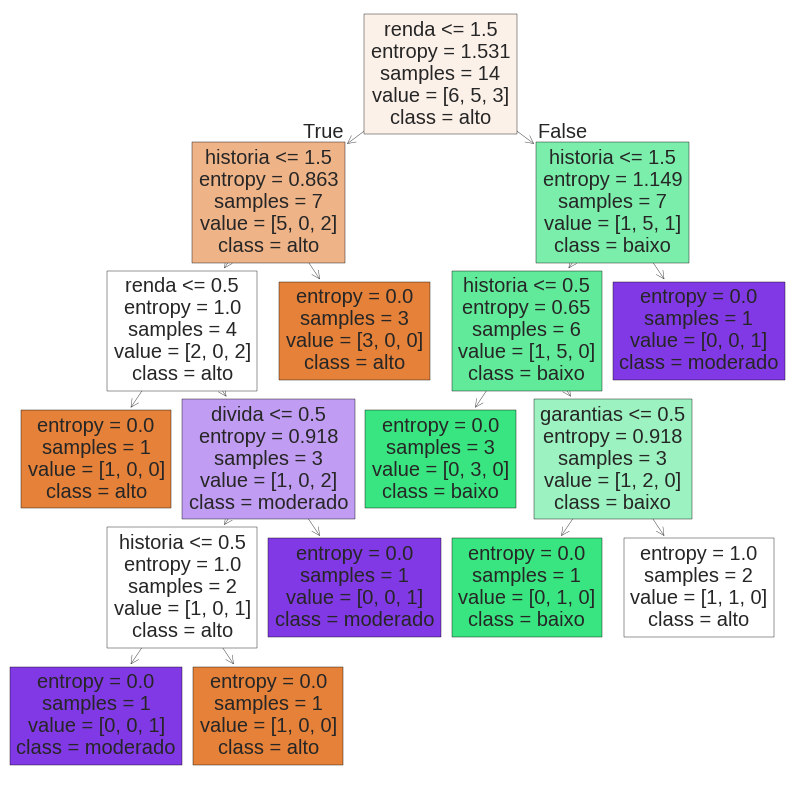

In [9]:
previsores = ['historia', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True)
figura.savefig(caminho+'/arvore_risco_credito.png')

In [10]:
# Historia - boa(0), divida - alta(0), garantia - nenhuma(1), renda - > 35(2)
# Historia - ruim(2), divida - alta(0), garantia - adequada(0), renda - < 15(0)
previsao_risco_credito = arvore_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsao_risco_credito

array(['baixo', 'alto'], dtype=object)

## Base - Credit Data

In [11]:
with open(caminho+ '/credit.pkl', 'rb') as f:
  X_credit_train , y_credit_train, X_credit_test, y_credit_test = pickle.load(f)

In [12]:
X_credit_train.shape, y_credit_train.shape

((1500, 3), (1500,))

In [13]:
X_credit_test.shape , y_credit_test.shape

((500, 3), (500,))

In [14]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
previsao_credit = arvore_credit.predict(X_credit_test)
previsao_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [16]:
accuracy_score(y_credit_test, previsao_credit)

0.982

0.982

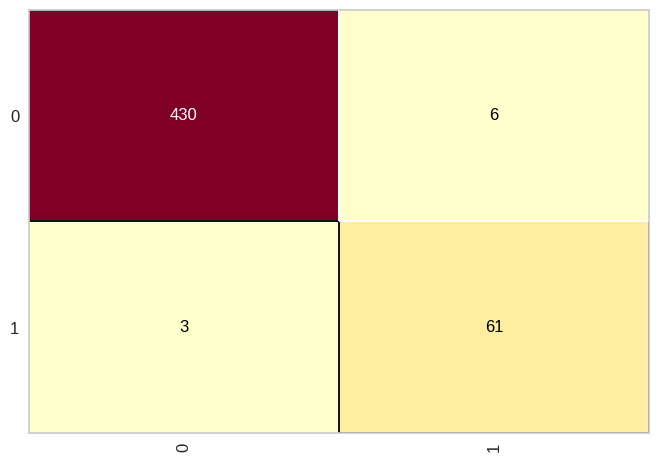

In [17]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [18]:
print(classification_report(y_credit_test, previsao_credit))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



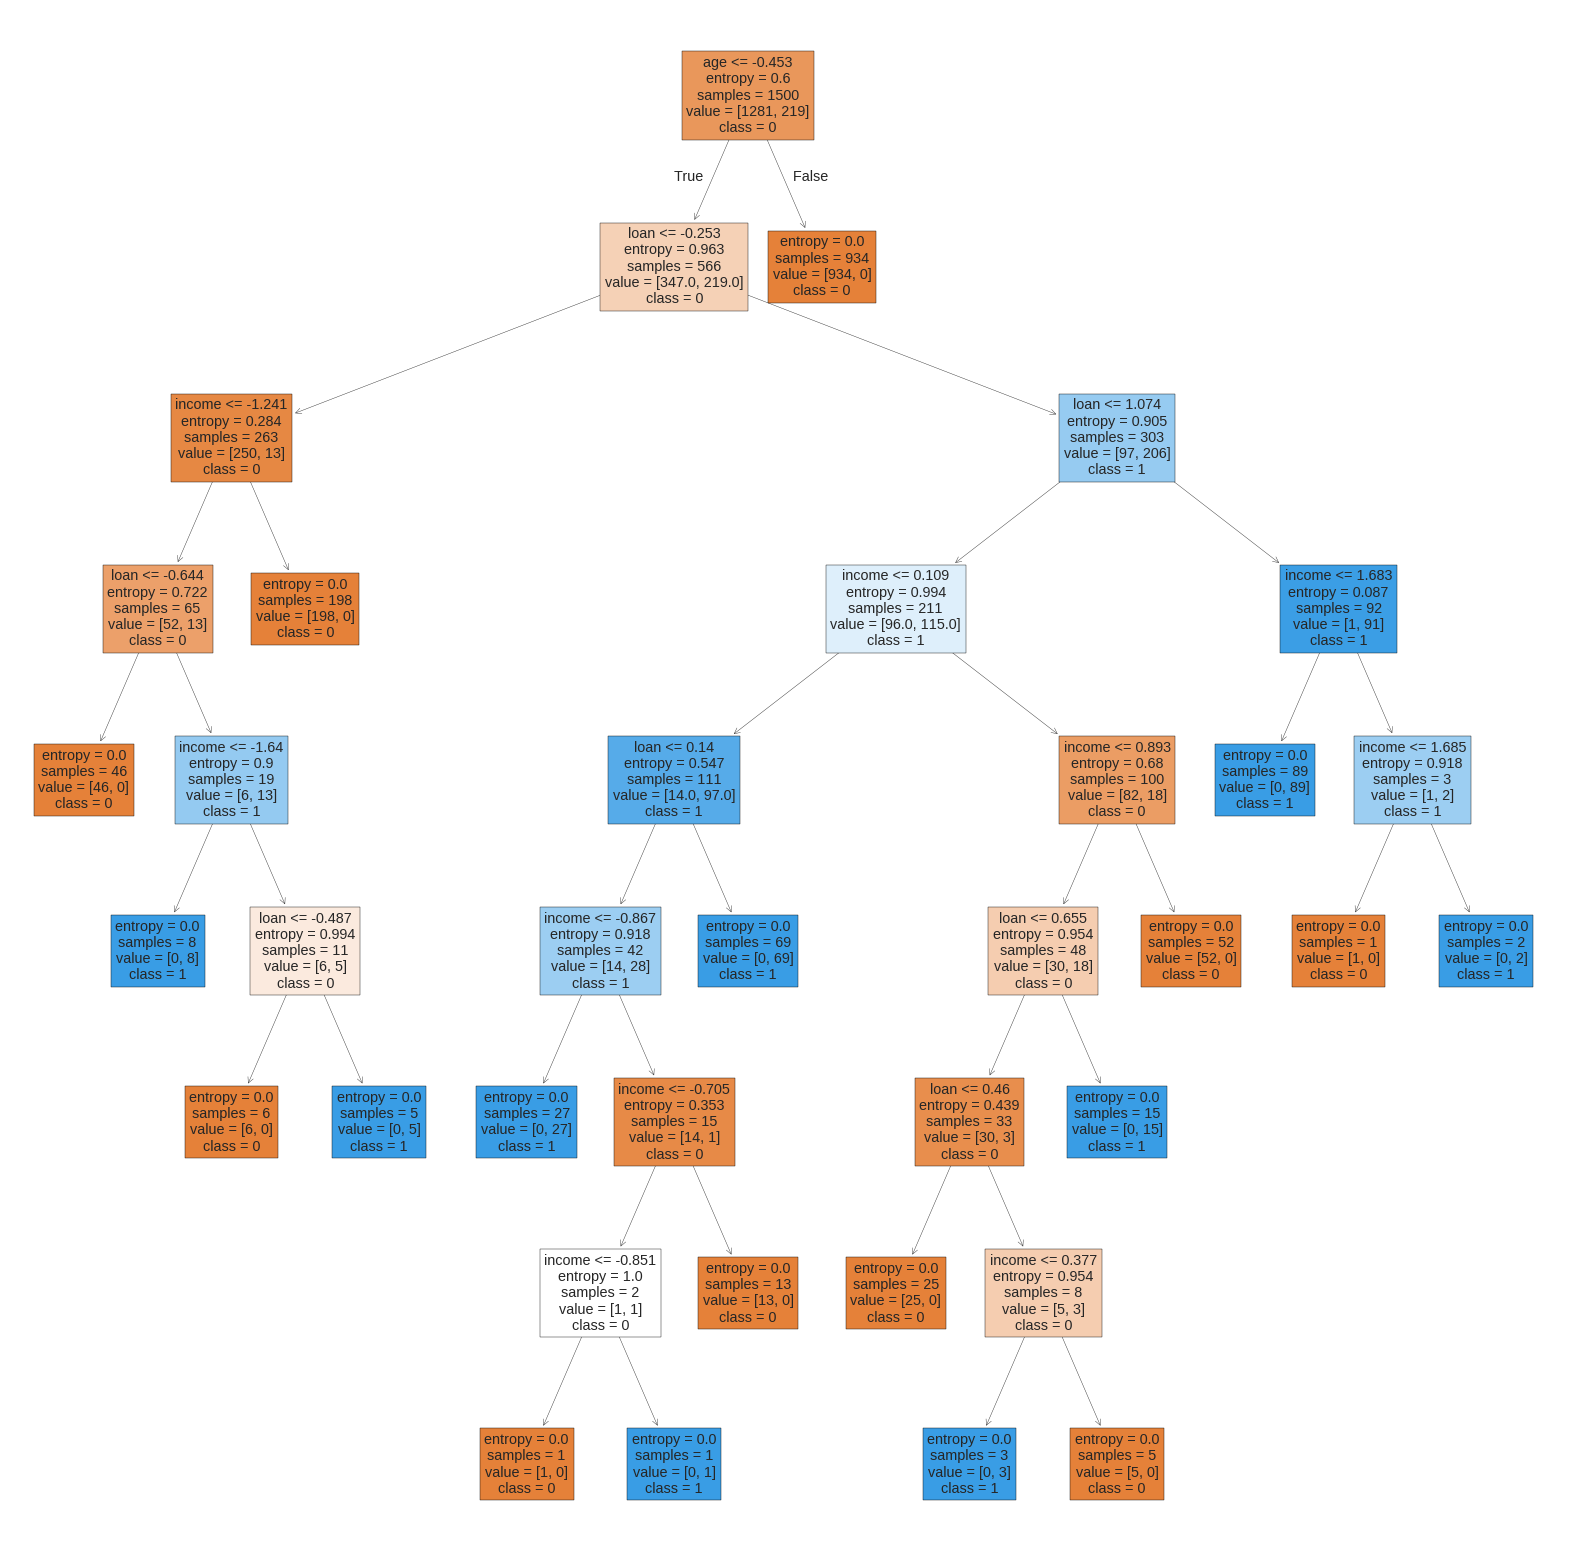

In [19]:
previsores_credit = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
tree.plot_tree(arvore_credit, feature_names=previsores_credit, class_names=['0','1'] ,filled=True)
fig.savefig(caminho+'/arvore_credit.png')

## Base - Census

In [20]:
with open(caminho+'/census.pkl', 'rb') as f:
  X_census_train, y_census_train, X_census_test, y_census_test = pickle.load(f)

In [21]:
X_census_train.shape, y_census_train.shape

((27676, 108), (27676,))

In [22]:
X_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [23]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_train, y_census_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
previsao_census = arvore_census.predict(X_census_test)
previsao_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [25]:
accuracy_score(y_census_test, previsao_census)

0.8104401228249745

0.8104401228249745

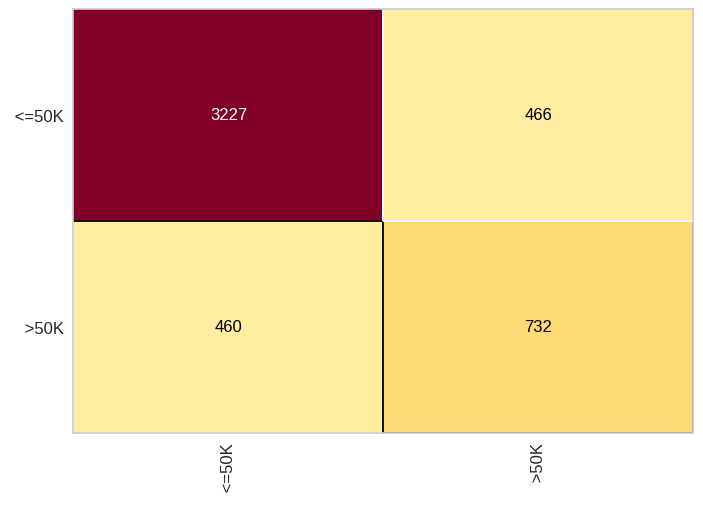

In [26]:
cm_census = ConfusionMatrix(arvore_census)
cm_census.fit(X_census_train, y_census_train)
cm_census.score(X_census_test, y_census_test)

In [27]:
print(classification_report(y_census_test, previsao_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

